# World Happiness Report

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [10]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
df.tail(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [12]:
df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
87,Portugal,Western Europe,88,5.102,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462


In [13]:
df.sample(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541


In [14]:
df.shape

(158, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

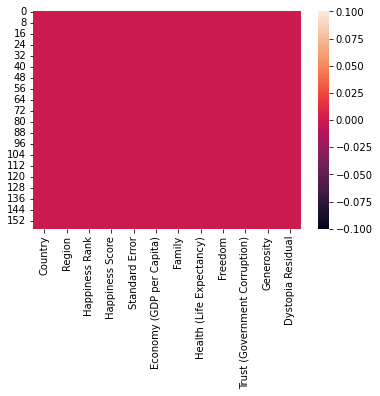

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [19]:
list(df.columns)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

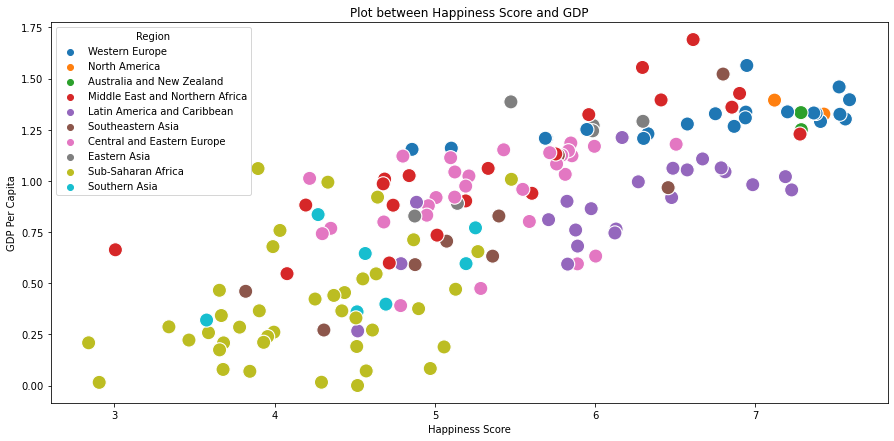

In [20]:
#plt b/w happiness and GDP

plt.figure(figsize=(15,7))
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',hue=df.Region,s=200,data=df)

plt.title('Plot between Happiness Score and GDP')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')

plt.show()

In [21]:
gdp_region=df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

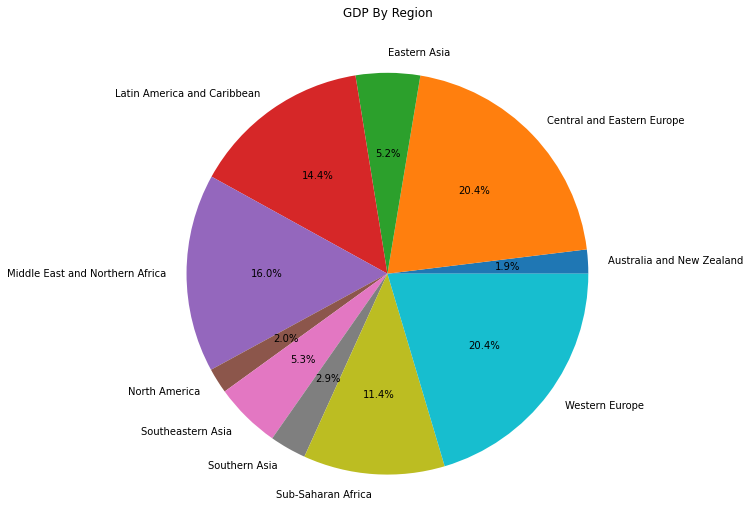

In [22]:
plt.figure(figsize=(9,10))
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP By Region')
plt.ylabel('')

In [23]:
#Total countries

total_country=df.groupby('Region')['Country'].count()
print(total_country)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64


<AxesSubplot:xlabel='Region', ylabel='count'>

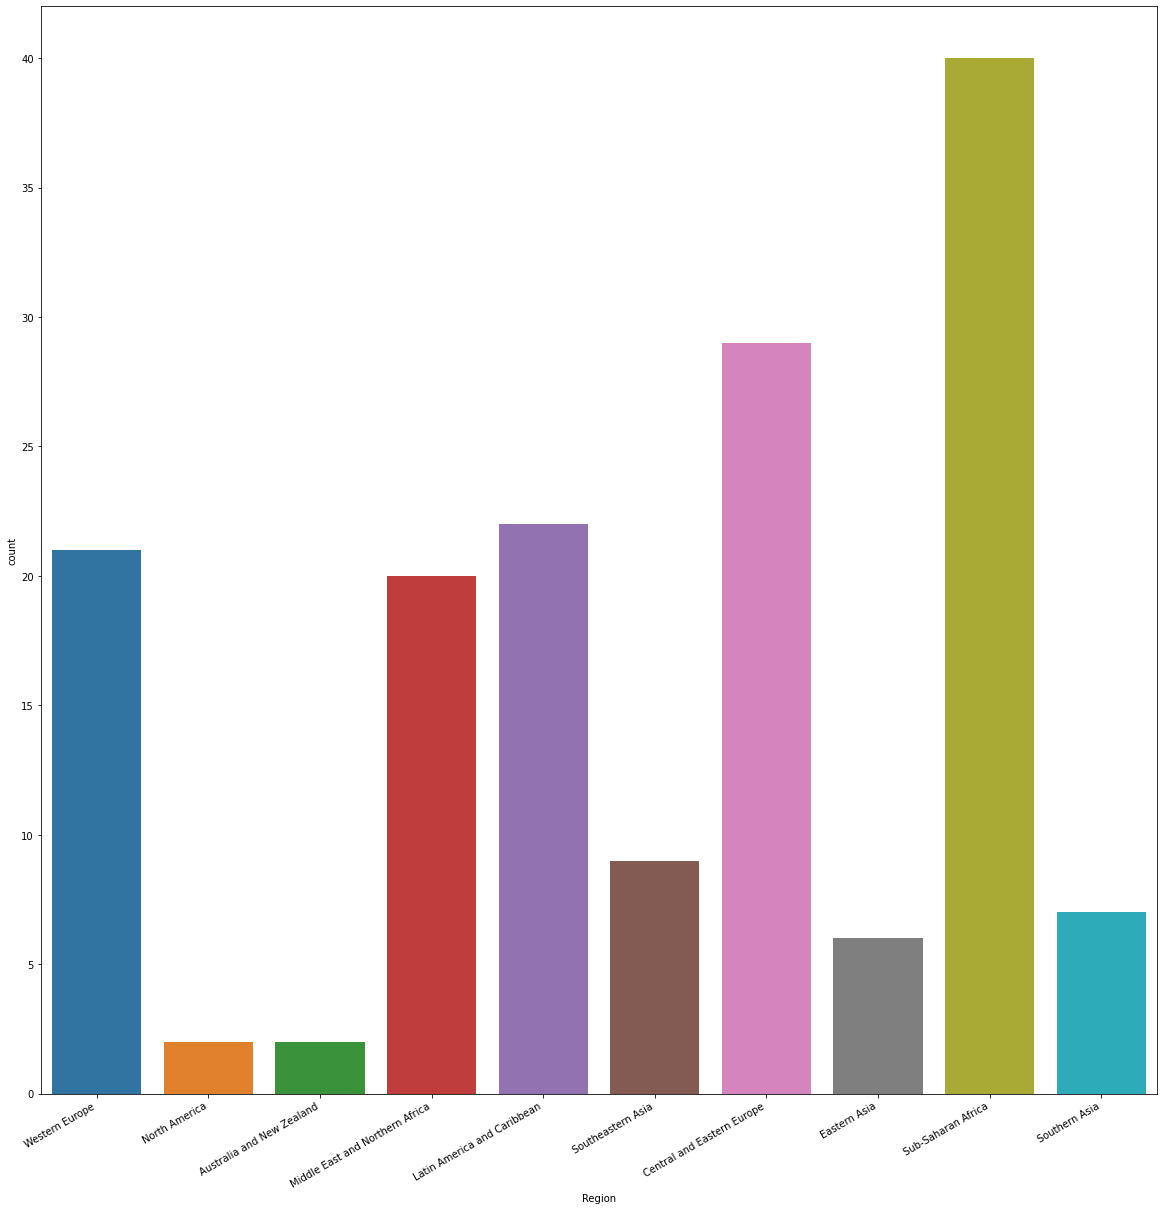

In [24]:
#count plot for Different Regions
plt.figure(figsize=(20,20))
plt.xticks(rotation=30,ha='right')
sns.countplot(df['Region'])

In [25]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

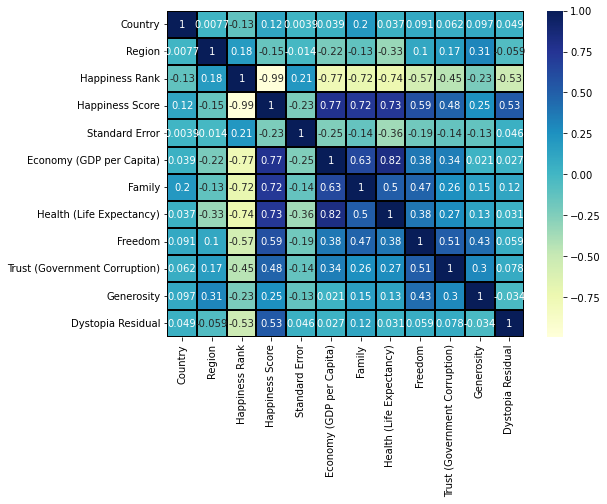

In [75]:
#correlation Map
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,fmt='.2g',linewidths=2,linecolor='black')


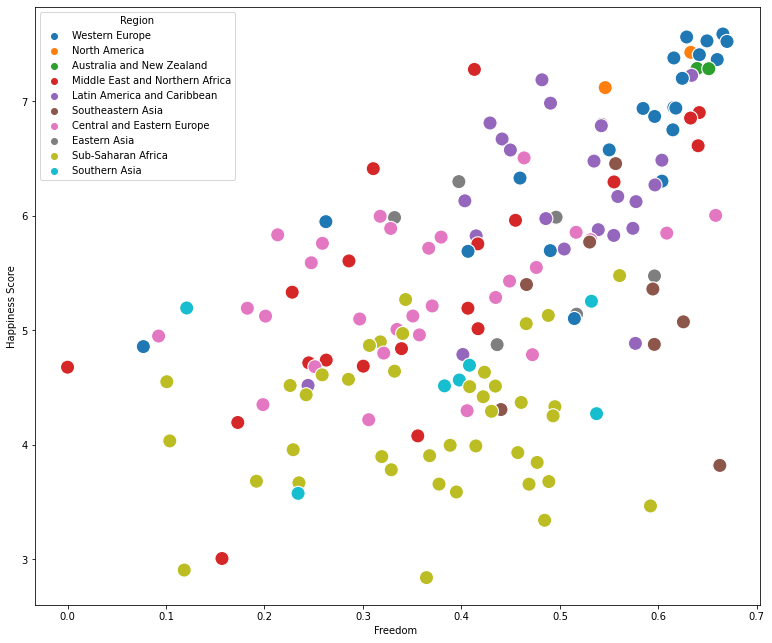

In [27]:
plt.figure(figsize=(13,11))
sns.scatterplot(df['Freedom'],df['Happiness Score'],hue=df.Region,s=200)
plt.xlabel('Freedom ')
plt.ylabel('Happiness Score')
plt.show()

In [28]:
#corruptions in regions

corruption=df.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption 

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


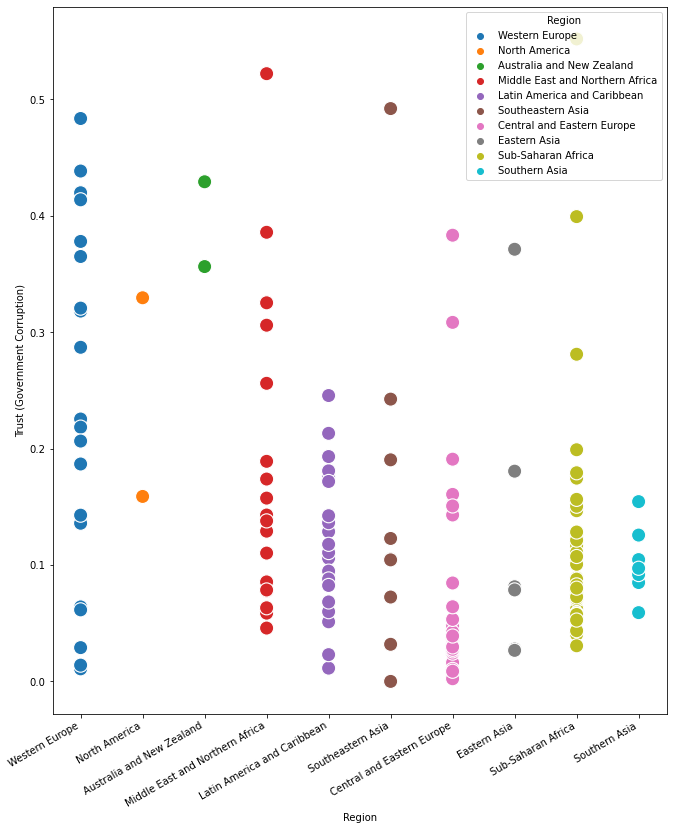

In [29]:
#relation between Region and Corruption

plt.figure(figsize=(11,13))
sns.scatterplot(df['Region'],df['Trust (Government Corruption)'],hue=df.Region,s=200)
plt.xticks(rotation=30,ha='right')
plt.show()

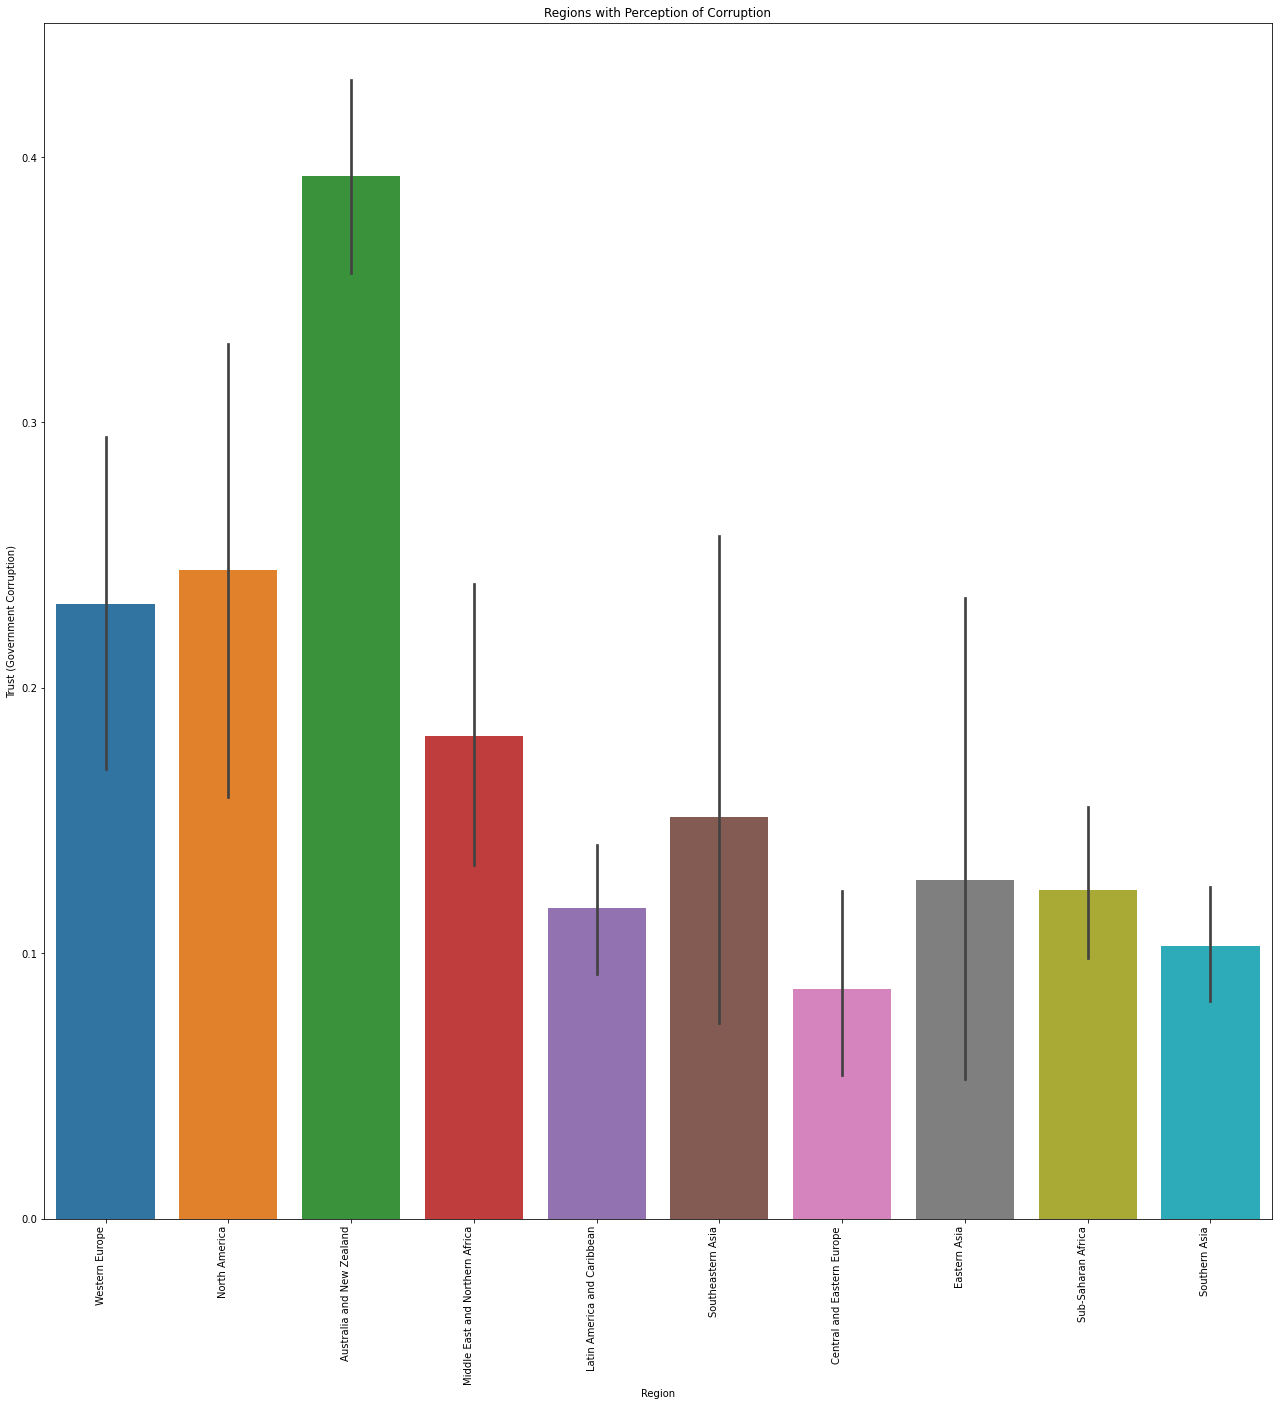

In [30]:
plt.figure(figsize=(22,22))
plt.title('Regions with Perception of Corruption')
plt.xlabel('Regions')
plt.ylabel('Corruption Index')
sns.barplot(df['Region'],(df['Trust (Government Corruption)']))
                             
plt.xticks(rotation=90,ha='right')
plt.show()

Fom above scatterplot we see that there is lot of corruption in Regions like
1)western Europe
2)Middle East and Northern Africa 
3)Southeastern Asia 

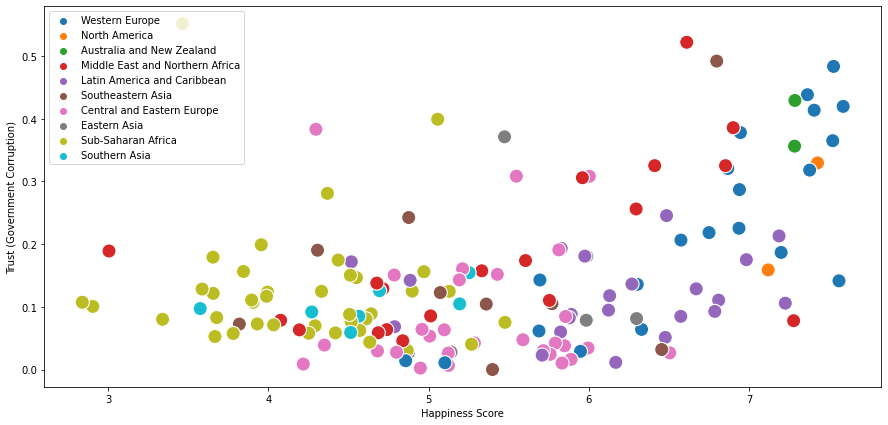

In [31]:
plt.figure(figsize=(15,7))
sns.scatterplot(df['Happiness Score'],df['Trust (Government Corruption)'],hue=df.Region,s=200)
plt.legend(loc='upper left')
plt.show()

In [32]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [33]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# checking Outliers

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

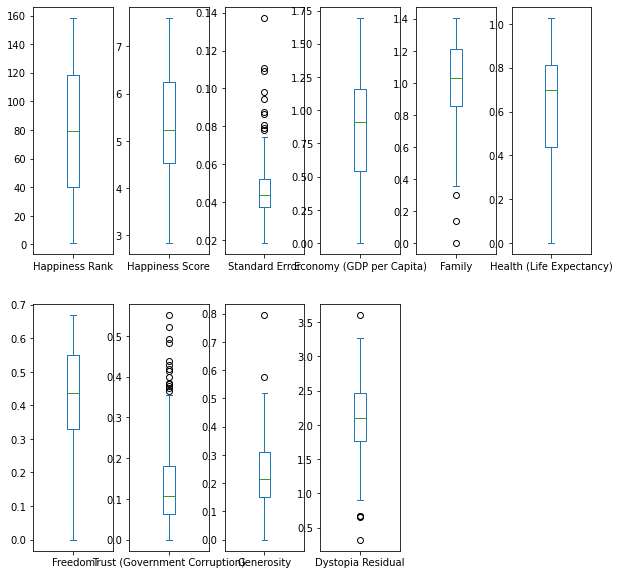

In [34]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

from obove outcomes we can see that columns[Trust (Government Corruption),Generosity,Standard Error,Dystopia Residual] plots having the outliers.

# Skewness:

In [35]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:xlabel='Family', ylabel='Density'>

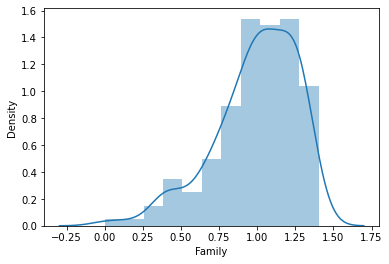

In [36]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

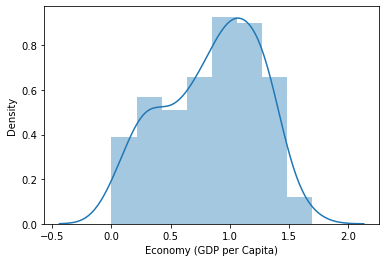

In [37]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

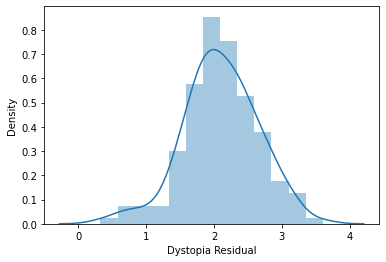

In [38]:
sns.distplot(df['Dystopia Residual'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

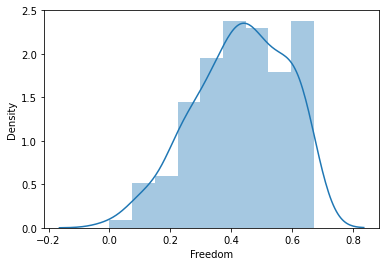

In [39]:
sns.distplot(df['Freedom'])

# Label Encoder

With the use of Label Encoder we convert our categorical  data in to Numerical

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
list=['Country','Region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [42]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Z-score
With the help of Z-score we remove the outliers from our data

In [43]:
#Remove outliers

from scipy.stats import zscore
import numpy as np

In [44]:
z=np.abs(zscore(df))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [45]:
threshold=3
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))


(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6]))


In [46]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape',dfnew.shape)

df=dfnew

dfnew.shape (149, 12)


In [47]:
df.shape

(149, 12)

# model without outliers

Dividing the data in features and vectors

In [48]:
x=df.iloc[:,0:-1]
x.shape

(149, 11)

In [49]:
y=df.iloc[:,[-1]]
y.shape

(149, 1)

# Transforming the data to remove skewness:
    

In [50]:
from sklearn.preprocessing import power_transform

In [51]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [53]:
x=ss.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989335,
        -0.14727363, -0.17248608]])

# Model Building 

So now we have to Build our model 

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)

In [55]:
x_train.shape 

(104, 11)

In [56]:
y_train.shape 

(104, 1)

In [57]:
x_test.shape

(45, 11)

In [58]:
y_test.shape

(45, 1)

In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.score(x_train,y_train)

0.9806313985816099

In [61]:
#predict the value

pred=lr.predict(x_test)
print('predict result price :',pred)
print('actual price:',y_test)

predict result price : [[1.85930159]
 [2.28211385]
 [1.7006169 ]
 [2.1551447 ]
 [1.58055417]
 [2.68421871]
 [2.26473893]
 [2.47686213]
 [2.54363695]
 [2.49801624]
 [1.52292529]
 [2.28109805]
 [2.07624468]
 [2.18967456]
 [1.81972194]
 [2.13888484]
 [3.02073659]
 [2.44620394]
 [2.14133281]
 [2.28664026]
 [2.22786886]
 [1.94304226]
 [1.91196655]
 [1.53947373]
 [0.87168658]
 [2.43031202]
 [2.85291497]
 [2.50140319]
 [1.95578047]
 [2.3836428 ]
 [1.3396848 ]
 [1.89407037]
 [1.73902722]
 [2.800581  ]
 [3.15819274]
 [2.06568311]
 [0.74684737]
 [1.81791155]
 [1.42524962]
 [2.00460496]
 [2.13313241]
 [2.32771234]
 [1.75693625]
 [1.56875582]
 [1.84357689]]
actual price:      Dystopia Residual
98             1.73799
43             2.23741
138            1.68135
123            2.11773
72             1.58782
119            2.86712
19             2.24743
55             2.44649
34             2.43872
130            2.80791
141            1.44395
37             2.32323
20             1.96994
75        

In [62]:
print('error')

print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean Absolute Error 0.07283121374709389
Mean Squared Error 0.010309649067833564
Root Mean Squared Error 0.10153644206802583


# R2 score

change comming in the y whenever x is being changed

In [63]:
print(r2_score(y_test,pred))

0.9608371585279628


# Saving the model

In [64]:
import joblib

In [65]:
joblib.dump(lr,'lrfile.obj')
lr_from_joblib=joblib.load('lrfile.obj')

In [66]:
lr_from_joblib.predict(x_test)

array([[1.85930159],
       [2.28211385],
       [1.7006169 ],
       [2.1551447 ],
       [1.58055417],
       [2.68421871],
       [2.26473893],
       [2.47686213],
       [2.54363695],
       [2.49801624],
       [1.52292529],
       [2.28109805],
       [2.07624468],
       [2.18967456],
       [1.81972194],
       [2.13888484],
       [3.02073659],
       [2.44620394],
       [2.14133281],
       [2.28664026],
       [2.22786886],
       [1.94304226],
       [1.91196655],
       [1.53947373],
       [0.87168658],
       [2.43031202],
       [2.85291497],
       [2.50140319],
       [1.95578047],
       [2.3836428 ],
       [1.3396848 ],
       [1.89407037],
       [1.73902722],
       [2.800581  ],
       [3.15819274],
       [2.06568311],
       [0.74684737],
       [1.81791155],
       [1.42524962],
       [2.00460496],
       [2.13313241],
       [2.32771234],
       [1.75693625],
       [1.56875582],
       [1.84357689]])